# Naive Bayes

In [25]:
%%capture

import sys
!{sys.executable} -m pip install nbformat

%run -G ./preprocessor.py

In [26]:
# import libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

### NB-model

In [27]:
# naive bayes model
nb = GaussianNB()

scaler.fit(X_train)
nb.fit(X_train, np.asarray(y_train))

yhat = nb.predict(X_test)

## Model evaluation

### Train evaluation

/home/aske/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.98      0.92    283253
           1       0.98      0.84      0.90    283253

    accuracy                           0.91    566506
   macro avg       0.92      0.91      0.91    566506
weighted avg       0.92      0.91      0.91    566506



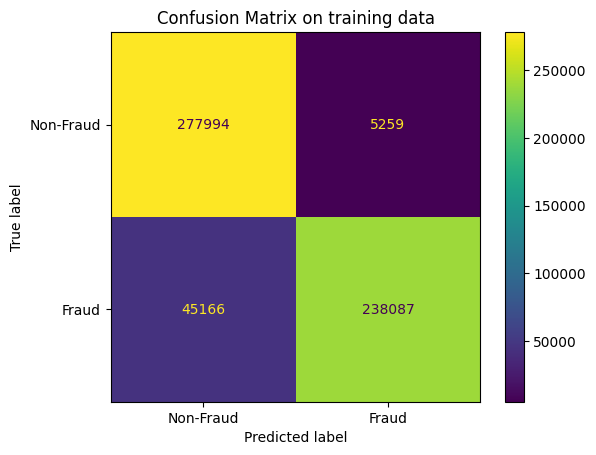

In [28]:
# train data
print(classification_report(y_train, nb.predict(scaler.transform(X_train))))

cm = confusion_matrix(y_train, nb.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot()
plt.title('Confusion Matrix on training data')
plt.show()

### Test evaluation

/home/aske/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56654
           1       0.06      0.77      0.11        92

    accuracy                           0.98     56746
   macro avg       0.53      0.88      0.55     56746
weighted avg       1.00      0.98      0.99     56746



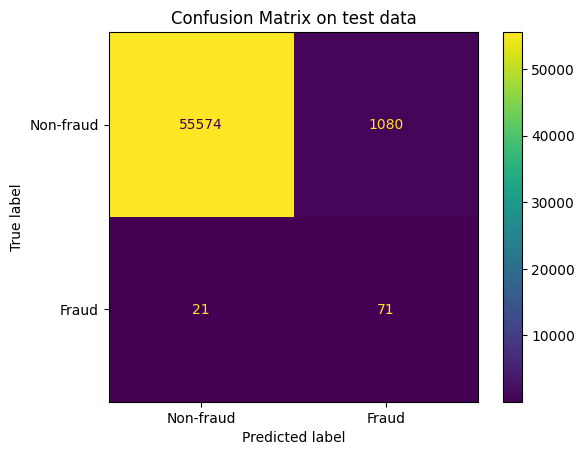

In [31]:
# test data
print(classification_report(y_test, nb.predict(scaler.transform(X_test))))

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot()
plt.title('Confusion Matrix on test data')
plt.show()

### Conclusion

Comparing this naive bayesian model to our previos models (logistic and k-nearest-neighbour), this model has the lowest **recall** score. The model is therefore less suitied for predicting credit card fraud. On the other hand, the precision is a little higher than the logistic model(0.04), but a lot less than for knn (0.26). This could be because has lower variance whereas logostic regression has lower bias. 